<img src = "https://evangsmailoa.files.wordpress.com/2019/09/ml.png"  align = "center">

#<center>Regresi Non Linear</center>
Sekarang kita belajar tentang regresi yang tidak linear. Seperti biasa, kita <b>import library</b> terlebih dahulu:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Walaupun Regresi Linear sangat bagus untuk menyelesaikan beberapa masalah, namun RL tidak dapat diterapkan pada semua dataset. Oleh karenanya kita butuh juga Regresi Non Linear.

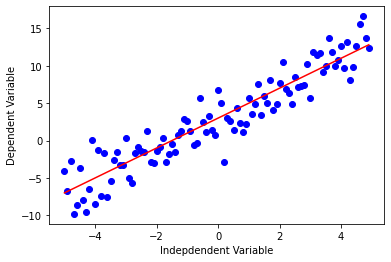

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

# Ingat persamaan Y = (a)X + (b)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Mari kita lihat grafik fungsi kubik:

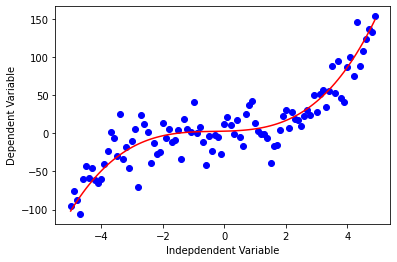

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

# Ingat untuk Regresi Linear Y=(a)X+(b), namun untuk persamaan non Linear berbeda!
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Pada hasil gambar di atas dapat dilihat fungsi **$x^3$** dan **$x^2$** adalah independent variables. Inilah fungsi **non-linear**.

## Contoh fungsi Quadratic
Persamaannya: $$ Y = X^2 $$

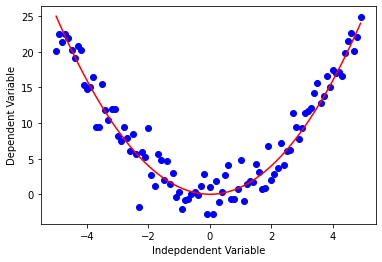

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Contoh fungsi Exponential
Fungsinya: $$ Y = a + b c^X$$ dimana b ≠0, c > 0 , c ≠1, dan x adalah bilangan real. Basis, c, adalah nilai konstanta dan eksponensial, x, adalah sebuah variabel.


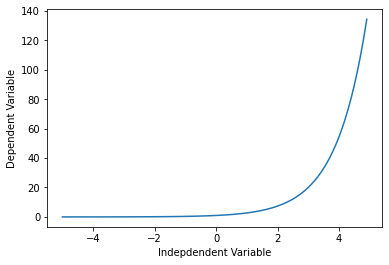

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Contoh fungsi Logarithmic

Persamaannya: $$ y = \log(x)$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


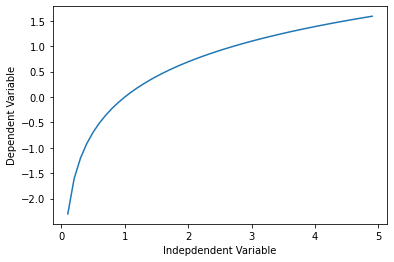

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic
Persamaannya: $$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

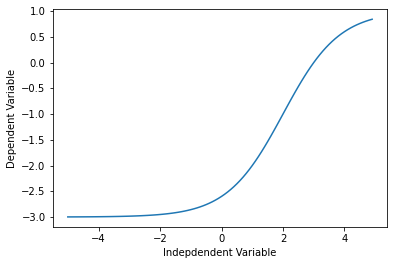

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<a id="ref2"></a>
# Contoh Regresi Non-Linear

In [ ]:
import numpy as np
import pandas as pd

# download dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
# ubah ke data-frame   
df = pd.read_csv("china_gdp.csv")
df.tail()

2021-06-25 09:55:12 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


### Plotting Dataset ###
Ini adalah grafik dari dataset. Terlihat seperti fungsi logistik atau fungsi eksponensial. Pertumbuhannya sangat lambat, kemudian mulai 2005 bertumbuh sangat signifikan. Dan naik drastis di tahun 2010.

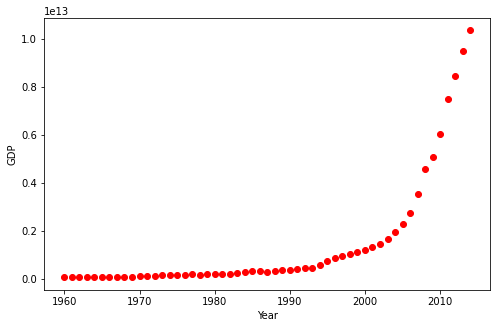

In [ ]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Pilih model ###

Dari grafik awal kita bisa lihat bahwa fungsi logistik cocok untuk kasus ini.

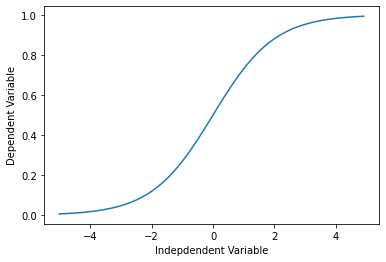

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Formula untuk fungsi logistik sebagai berikut:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Kontrol untuk kecuraman kurva,

$\beta_2$: Untuk geser kurva terhadap sumbu X.

### Membangun Model ###
Sekarang kita buat model regresi untuk kasus tersebut. 

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Kita coba ddengan contoh fungsi sigmoid terhadap data:

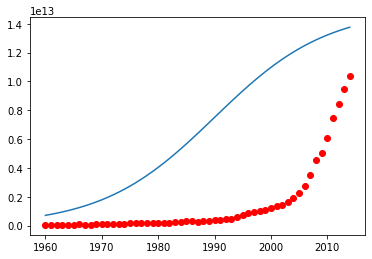

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

# fungsi logistik (sigmoid)
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# Inisialisasi terhadap datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Kita harus dapatkan parameter terbaik untuk model kita, oleh karenanya yang pertama harus dilakukan adalah normalisasi x dan y:

In [ ]:
# Normalisasi data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Bagaimana menemukan parameter terbaik untuk **fit line** kita?

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Cetak parameter terakhir
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Sekarang kita plot-kan ke hasil model regressi.

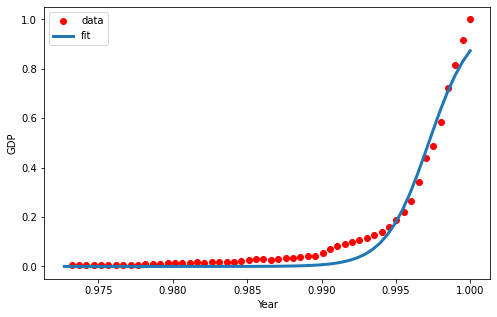

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## LATIHAN
Silakan hitung akurasi dari model yang kita buat!

In [ ]:
# Tulis kodingmu di sini

Klik __2X__ untuk lihat jawaban.

<!-- Jawabannya:
    
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

-->

# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2019 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar Machine Learning di Progdi Teknik Informatika - FTI UKSW</p>